# Linear Regression (Examples)

### Linear Model Regression 

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]



## Linear regression

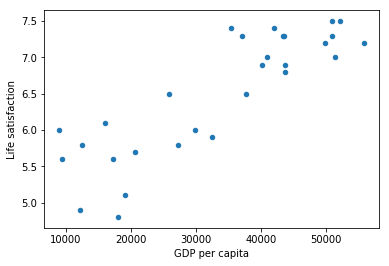

Training set score: 0.73
[[5.96242338]]


In [3]:
#Load the data
oecd_bli = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/BLI2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values= "n/a")

#Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#Visualize the data
country_stats.plot(kind='scatter',x='GDP per capita', y = 'Life satisfaction')
plt.show()

#Select a linear model 
model = sklearn.linear_model.LinearRegression()

#Train the model
model.fit(X,y)
print('Training set score: {:.2f}'.format(model.score(X,y)))

#Make a prediction for Cyprus
X_new = [[22587]] #Cyprus 'GDP per capita'
print(model.predict(X_new)) #outputs [[5.96~]]

## K Nearest Neighbors

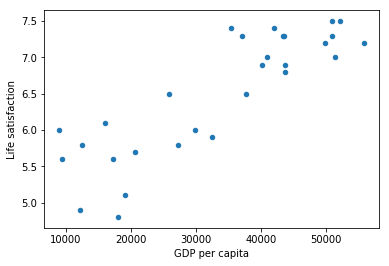

Training set score: 0.85
Prediction: [[5.76666667]]


In [4]:
from sklearn.neighbors import KNeighborsRegressor
#Load the data
oecd_bli = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/BLI2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values= "n/a")

#Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#Visualize the data
country_stats.plot(kind='scatter',x='GDP per capita', y = 'Life satisfaction')
plt.show()

#Select a linear model 
model_Knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

#Train the model
model_Knn.fit(X,y)
print('Training set score: {:.2f}'.format(model_Knn.score(X,y)))
#Make a prediction for Cyprus
X_new = [[22587]] #Cyprus 'GDP per capita'
print('Prediction: {}'.format(model_Knn.predict(X_new)))

## Ridge

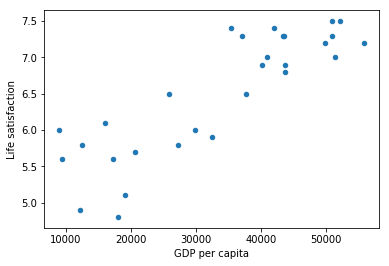

Training set score: 0.73
Prediction: [[5.96242338]]


In [5]:
from sklearn.linear_model import Ridge
#Load the data
oecd_bli = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/BLI2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values= "n/a")

#Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#Visualize the data
country_stats.plot(kind='scatter',x='GDP per capita', y = 'Life satisfaction')
plt.show()

#Select a linear model ridge 
model_ridge = sklearn.linear_model.Ridge(alpha=10)
#Train the model
model_ridge.fit(X,y)
print('Training set score: {:.2f}'.format(model_ridge.score(X,y)))
#Make a prediction for Cyprus
X_new = [[22587]] #Cyprus 'GDP per capita'
print('Prediction: {}'.format(model_ridge.predict(X_new))) #outputs [[5.96~]]

## LASSO

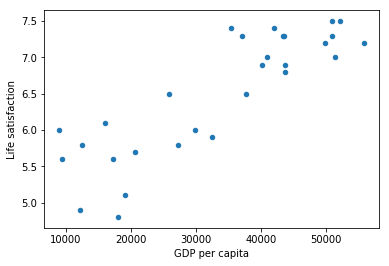

Training set score: 0.73
Number of features used: 1
Prediction: [[5.96242338]]


In [6]:
from sklearn.linear_model import Lasso
#Load the data
oecd_bli = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/BLI2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values= "n/a")

#Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

#Visualize the data
country_stats.plot(kind='scatter',x='GDP per capita', y = 'Life satisfaction')
plt.show()

#Select a linear model 
model_lasso = sklearn.linear_model.LinearRegression()

#Train the model
model_lasso.fit(X,y)
print('Training set score: {:.2f}'.format(model_lasso.score(X,y)))
print('Number of features used: {}'.format(np.sum(model_lasso.coef_!=0)))
#Make a prediction for Cyprus
X_new = [[22587]] #Cyprus 'GDP per capita'
print('Prediction: {}'.format(model_lasso.predict(X_new))) #outputs [[5.96~]]

### Load & Prepare Life Satisfaction Data

In [7]:
oecd_bli = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/BLI2015.csv",thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country",columns='Indicator',values="Value")
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [8]:
oecd_bli.head()

Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   
Belgium             21.0           6.6                          4.5   
Brazil              18.0           7.9                          4.0   
Canada              15.0           1.3                         10.5   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   
Belgium                                   2.0                    72.0   
Brazil                                    6.7                    45.0   
Canada                                    0.2                    89.0   

Indicator  Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   
Austria                                 7.61             72.0            0.4   
Belgium                                 4.57             62.0            1.1   
Brazil                                 10.41             67.0           25.5   
Canada                                  3.94             72.0            1.5   

Indicator  Household net adjusted disposable income  \
Country                                               
Australia                                   31588.0   
Austria                                     31173.0   
Belgium                                     28307.0   
Brazil                                      11664.0   
Canada                                      29365.0   

Indicator  Household net financial wealth  ...  Long-term unemployment rate  \
Country                                    ...                                
Australia                         47657.0  ...                         1.08   
Austria                           49887.0  ...                         1.19   
Belgium                           83876.0  ...                         3.88   
Brazil                             6844.0  ...                         1.97   
Canada                            67913.0  ...                         0.90   

Indicator  Personal earnings  Quality of support network  Rooms per person  \
Country                                                                      
Australia            50449.0                        92.0               2.3   
Austria              45199.0                        89.0               1.6   
Belgium              48082.0                        94.0               2.2   
Brazil               17177.0                        90.0               1.6   
Canada               46911.0                        92.0               2.5   

Indicator  Self-reported health  Student skills  \
Country                                           
Australia                  85.0           512.0   
Austria                    69.0           500.0   
Belgium                    74.0           509.0   
Brazil                     69.0           402.0   
Canada                     89.0           522.0   

Indicator  Time devoted to leisure and personal care  Voter turnout  \
Country                                                               
Australia                                      14.41           93.0   
Austria                                        14.46           75.0   
Belgium                                        15.71           89.0   
Brazil                                         14.97           79.0   
Canada                                         14.25           61.0   

Indicator  Water quality  Years in education  
Country                                

In [9]:
oecd_bli.shape

(37, 24)

In [10]:
oecd_bli.keys()

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [11]:
oecd_bli.index


Index(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'OECD - Total', 'Poland', 'Portugal', 'Russia', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [12]:
oecd_bli.loc['Mexico']

Indicator
Air pollution                                   30.00
Assault rate                                    12.80
Consultation on rule-making                      9.00
Dwellings without basic facilities               4.20
Educational attainment                          37.00
Employees working very long hours               28.83
Employment rate                                 61.00
Homicide rate                                   23.40
Household net adjusted disposable income     13085.00
Household net financial wealth                9056.00
Housing expenditure                             21.00
Job security                                     4.90
Life expectancy                                 74.60
Life satisfaction                                6.70
Long-term unemployment rate                      0.08
Personal earnings                            16193.00
Quality of support network                      77.00
Rooms per person                                 1.00
Self-reported heal

## Load & Prepare GDP per capita

In [13]:
dpg_per_capita = pd.read_csv("~/Documents/Projects/Housing/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')
gdp_per_capita.rename(columns={"2015":"GDP per capita"} ,inplace=True)
print(gdp_per_capita.keys())

#gdp_per_capita.set_index("Country",inplace = True)
gdp_per_capita.head(2)


Index(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes',
       'GDP per capita', 'Estimates Start After'],
      dtype='object')


Subject Descriptor         Units  \
Country                                                                        
Afghanistan  Gross domestic product per capita, current prices  U.S. dollars   
Albania      Gross domestic product per capita, current prices  U.S. dollars   

             Scale                      Country/Series-specific Notes  \
Country                                                                 
Afghanistan  Units  See notes for:  Gross domestic product, curren...   
Albania      Units  See notes for:  Gross domestic product, curren...   

             GDP per capita  Estimates Start After  
Country                                             
Afghanistan         599.994                 2013.0  
Albania            3995.383                 2010.0

In [14]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index =True)
full_country_stats.sort_values(by = "GDP per capita",inplace=True)
full_country_stats

Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Brazil                    18.0           7.9                          4.0   
Mexico                    30.0          12.8                          9.0   
Russia                    15.0           3.8                          2.5   
Turkey                    35.0           5.0                          5.5   
Hungary                   15.0           3.6                          7.9   
Poland                    33.0           1.4                         10.8   
Chile                     46.0           6.9                          2.0   
Slovak Republic           13.0           3.0                          6.6   
Czech Republic            16.0           2.8                          6.8   
Estonia                    9.0           5.5                          3.3   
Greece                    27.0           3.7                          6.5   
Portugal                  18.0           5.7                          6.5   
Slovenia                  26.0           3.9                         10.3   
Spain                     24.0           4.2                          7.3   
Korea                     30.0           2.1                         10.4   
Italy                     21.0           4.7                          5.0   
Japan                     24.0           1.4                          7.3   
Israel                    21.0           6.4                          2.5   
New Zealand               11.0           2.2                         10.3   
France                    12.0           5.0                          3.5   
Belgium                   21.0           6.6                          4.5   
Germany                   16.0           3.6                          4.5   
Finland                   15.0           2.4                          9.0   
Canada                    15.0           1.3                         10.5   
Netherlands               30.0           4.9                          6.1   
Austria                   27.0           3.4                          7.1   
United Kingdom            13.0           1.9                         11.5   
Sweden                    10.0           5.1                         10.9   
Iceland                   18.0           2.7                          5.1   
Australia                 13.0           2.1                         10.5   
Ireland                   13.0           2.6                          9.0   
Denmark                   15.0           3.9                          7.0   
United States             18.0           1.5                          8.3   
Norway                    16.0           3.3                          8.1   
Switzerland               20.0           4.2                          8.4   
Luxembourg                12.0           4.3                          6.0   

                 Dwellings without basic facilities  Educational attainment  \
Country                                                                       
Brazil                                          6.7                    45.0   
Mexico                                          4.2                    37.0   
Russia                                         15.1                    94.0   
Turkey                                         12.7                    34.0   
Hungary                                         4.8                    82.0   
Poland                                          3.2                    90.0   
Chile                                           9.4                    57.0   
Slovak Republic                                 0.6                    92.0   
Czech Republic                                  0.9                    92.0   
Estonia                                         8.1                    90.0   
Greece                                          0.7                    68.0   
Portugal                                        0.9            

In [15]:
full_country_stats[["GDP per capita","Life satisfaction"]].loc["Mexico"]

GDP per capita       9009.28
Life satisfaction       6.70
Name: Mexico, dtype: float64

In [16]:
full_country_stats.index

Index(['Brazil', 'Mexico', 'Russia', 'Turkey', 'Hungary', 'Poland', 'Chile',
       'Slovak Republic', 'Czech Republic', 'Estonia', 'Greece', 'Portugal',
       'Slovenia', 'Spain', 'Korea', 'Italy', 'Japan', 'Israel', 'New Zealand',
       'France', 'Belgium', 'Germany', 'Finland', 'Canada', 'Netherlands',
       'Austria', 'United Kingdom', 'Sweden', 'Iceland', 'Australia',
       'Ireland', 'Denmark', 'United States', 'Norway', 'Switzerland',
       'Luxembourg'],
      dtype='object', name='Country')

In [17]:
for el in full_country_stats.index:
    print(el)

Brazil
Mexico
Russia
Turkey
Hungary
Poland
Chile
Slovak Republic
Czech Republic
Estonia
Greece
Portugal
Slovenia
Spain
Korea
Italy
Japan
Israel
New Zealand
France
Belgium
Germany
Finland
Canada
Netherlands
Austria
United Kingdom
Sweden
Iceland
Australia
Ireland
Denmark
United States
Norway
Switzerland
Luxembourg


In [18]:
full_country_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Brazil to Luxembourg
Data columns (total 30 columns):
Air pollution                                36 non-null float64
Assault rate                                 36 non-null float64
Consultation on rule-making                  36 non-null float64
Dwellings without basic facilities           36 non-null float64
Educational attainment                       36 non-null float64
Employees working very long hours            36 non-null float64
Employment rate                              36 non-null float64
Homicide rate                                36 non-null float64
Household net adjusted disposable income     36 non-null float64
Household net financial wealth               36 non-null float64
Housing expenditure                          36 non-null float64
Job security                                 36 non-null float64
Life expectancy                              36 non-null float64
Life satisfaction                           

In [19]:
print(full_country_stats.shape)

(36, 30)


In [20]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]


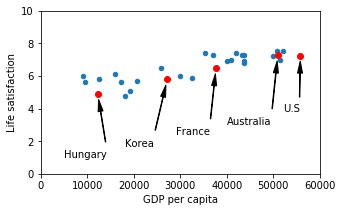

In [21]:
sample_data.plot(kind='scatter',x='GDP per capita',y='Life satisfaction',figsize=(5,3))
plt.axis([0,60000,0,10])
position_text ={
    "Hungary": (5000,1),
    #"Mexico": (4500,1.5),
    "Korea": (18000,1.7),
    "France": (29000,2.4),
    "Australia": (40000, 3.0),
    "United States": (52000,3.8),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S" if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),xytext=pos_text,arrowprops=dict(facecolor='black',width=0.5,shrink=0.1,headwidth=5))
    plt.plot(pos_data_x,pos_data_y,"ro")
plt.show()